In [107]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Dataset from Database Source

In [108]:
import pymongo
from pymongo import MongoClient

In [109]:
client = MongoClient('localhost',27017)

In [110]:
client.list_database_names()

['House_Price_DB', 'admin', 'config', 'local']

In [111]:
#select database
db = client['House_Price_DB']
#select the collection within the database
test = db.House_Price_Project
#convert entire collection to Pandas dataframe
data = pd.DataFrame(list(test.find()))

In [128]:
data.head()

,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,PROPERTYCITY,PROPERTYSTATE,...,MUNIDESC,RECORDDATE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC
0,1075F00108000000,4720.0,,NaN,HIGHPOINT,DR,NaN,NaN,GIBSONIA,PA,...,Hampton,2012-09-27,2012-09-27,120000.0,15020,356,3,LOVE AND AFFECTION SALE,DE,DEED
1,0011A00237000000,0.0,,NaN,LOMBARD,ST,NaN,NaN,PITTSBURGH,PA,...,3rd Ward - PITTSBURGH,2015-01-06,2015-01-06,1783.0,TR15,00002,2,CITY TREASURER SALE,TS,TREASURER DEED
2,0011J00047000000,1903.0,,NaN,FORBES,AVE,NaN,NaN,PITTSBURGH,PA,...,1st Ward - PITTSBURGH,2012-10-26,2012-10-26,4643.0,TR13,003,2,CITY TREASURER SALE,TS,TREASURER DEED
3,0113B00029000000,479.0,,NaN,ROOSEVELT,AVE,NaN,NaN,PITTSBURGH,PA,...,Bellevue,2017-03-27,2017-03-06,0.0,16739,166,3,LOVE AND AFFECTION SALE,CO,CORRECTIVE DEED
4,0119S00024000000,5418.0,,NaN,CARNEGIE,ST,NaN,NaN,PITTSBURGH,PA,...,10th Ward - PITTSBURGH,2015-02-04,2015-02-04,27541.0,TR15,00059,GV,GOVERNMENT SALE,TS,TREASURER DEED


In [129]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PROPERTYHOUSENUM,307738.0,1440.010444,2063.976108,0.0,159.0,603.0,1813.0,39389.0
PROPERTYZIP,307755.0,15169.627437,92.813989,15003.0,15108.0,15204.0,15221.0,16229.0
SCHOOLCODE,307756.0,28.999058,15.068535,1.0,17.0,29.0,46.0,50.0
MUNICODE,307756.0,688.607075,340.616427,101.0,202.0,874.0,927.0,953.0
PRICE,305278.0,172554.424233,973742.816640,0.0,500.0,76000.0,185000.0,148752900.0


In [130]:
data.shape

(307756, 24)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307756 entries, 0 to 307755
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PARID                    307756 non-null  object 
 1   PROPERTYHOUSENUM         307738 non-null  float64
 2   PROPERTYFRACTION         307756 non-null  object 
 3   PROPERTYADDRESSDIR       12622 non-null   object 
 4   PROPERTYADDRESSSTREET    307748 non-null  object 
 5   PROPERTYADDRESSSUF       306397 non-null  object 
 6   PROPERTYADDRESSUNITDESC  5961 non-null    object 
 7   PROPERTYUNITNO           6140 non-null    object 
 8   PROPERTYCITY             307755 non-null  object 
 9   PROPERTYSTATE            307756 non-null  object 
 10  PROPERTYZIP              307755 non-null  float64
 11  SCHOOLCODE               307756 non-null  int64  
 12  SCHOOLDESC               307756 non-null  object 
 13  MUNICODE                 307756 non-null  int64  
 14  MUNI

**Total missing values for each feature**

In [132]:
data.isnull().sum()

PARID                           0
PROPERTYHOUSENUM               18
PROPERTYFRACTION                0
PROPERTYADDRESSDIR         295134
PROPERTYADDRESSSTREET           8
PROPERTYADDRESSSUF           1359
PROPERTYADDRESSUNITDESC    301795
PROPERTYUNITNO             301616
PROPERTYCITY                    1
PROPERTYSTATE                   0
PROPERTYZIP                     1
SCHOOLCODE                      0
SCHOOLDESC                      0
MUNICODE                        0
MUNIDESC                        0
RECORDDATE                   1226
SALEDATE                        0
PRICE                        2478
DEEDBOOK                      317
DEEDPAGE                      327
SALECODE                        0
SALEDESC                        0
INSTRTYP                        0
INSTRTYPDESC                    0
dtype: int64

**statistical information about the numeric columns in our dataset.**

In [133]:
data.describe(include=[np.number], percentiles=[.5]) \
.transpose().drop("count", axis=1)

,mean,std,min,50%,max
PROPERTYHOUSENUM,1440.010444,2063.976108,0.0,603.0,39389.0
PROPERTYZIP,15169.627437,92.813989,15003.0,15204.0,16229.0
SCHOOLCODE,28.999058,15.068535,1.0,29.0,50.0
MUNICODE,688.607075,340.616427,101.0,874.0,953.0
PRICE,172554.424233,973742.816640,0.0,76000.0,148752900.0


**statistical information about the non-numerical columns in our dataset:**

In [134]:
data.describe(include=[np.object]).transpose() \
.drop("count", axis=1)

,unique,top,freq
PARID,219493,0431B00017000000,20
PROPERTYFRACTION,1530,,303363
PROPERTYADDRESSDIR,4,N,3505
PROPERTYADDRESSSTREET,9123,WASHINGTON,1709
PROPERTYADDRESSSUF,48,ST,78459
PROPERTYADDRESSUNITDESC,10,UNIT,5497
PROPERTYUNITNO,1248,2,90
PROPERTYCITY,98,PITTSBURGH,166630
PROPERTYSTATE,1,PA,307756
SCHOOLDESC,46,Pittsburgh,76332


### Getting the number of missing values in each column

In [135]:
num_missing = data.isna().sum()

### Excluding columns that contains 0 missing values

In [136]:
num_missing = num_missing[num_missing > 0]

### Getting the percentages of missing values

In [137]:
percent_missing = num_missing * 100 / data.shape[0]

### Concatenating the number and perecentage of missing values # into one dataframe and sorting it

In [138]:
pd.concat([num_missing, percent_missing], axis=1, keys=['Missing Values', 'Percentage']).\
sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
PROPERTYADDRESSUNITDESC,301795,98.063076
PROPERTYUNITNO,301616,98.004913
PROPERTYADDRESSDIR,295134,95.898699
PRICE,2478,0.805183
PROPERTYADDRESSSUF,1359,0.441584
RECORDDATE,1226,0.398368
DEEDPAGE,327,0.106253
DEEDBOOK,317,0.103004
PROPERTYHOUSENUM,18,0.005849
PROPERTYADDRESSSTREET,8,0.002599


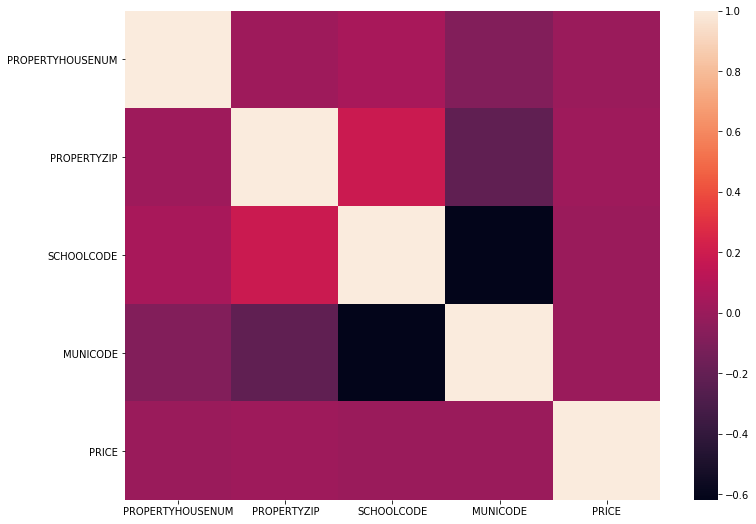

In [139]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(), ax=ax);

### Deleting Unimportant Columns

In [140]:
data.drop(['PARID','PROPERTYHOUSENUM','PROPERTYFRACTION','PROPERTYADDRESSDIR','PROPERTYADDRESSSUF', 'PROPERTYADDRESSUNITDESC','PROPERTYUNITNO', 'PROPERTYSTATE','PROPERTYZIP','SCHOOLDESC','MUNICODE','MUNIDESC','RECORDDATE', 'DEEDBOOK','DEEDPAGE','INSTRTYP','INSTRTYPDESC','SALECODE'],axis=1, inplace=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307756 entries, 0 to 307755
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PROPERTYADDRESSSTREET  307748 non-null  object 
 1   PROPERTYCITY           307755 non-null  object 
 2   SCHOOLCODE             307756 non-null  int64  
 3   SALEDATE               307756 non-null  object 
 4   PRICE                  305278 non-null  float64
 5   SALEDESC               307756 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.1+ MB


In [142]:
duplicate = data.duplicated()
print(duplicate.sum())

22285


In [143]:
data.drop_duplicates(inplace=True)

In [144]:
duplicate = data.duplicated()
print(duplicate.sum())

0


In [145]:
data.isna().sum()

PROPERTYADDRESSSTREET       8
PROPERTYCITY                1
SCHOOLCODE                  0
SALEDATE                    0
PRICE                    2144
SALEDESC                    0
dtype: int64

In [146]:
data.dropna(inplace=True)

In [147]:
data.isna().sum()

PROPERTYADDRESSSTREET    0
PROPERTYCITY             0
SCHOOLCODE               0
SALEDATE                 0
PRICE                    0
SALEDESC                 0
dtype: int64

In [148]:
data.shape

(283318, 6)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283318 entries, 0 to 307755
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PROPERTYADDRESSSTREET  283318 non-null  object 
 1   PROPERTYCITY           283318 non-null  object 
 2   SCHOOLCODE             283318 non-null  int64  
 3   SALEDATE               283318 non-null  object 
 4   PRICE                  283318 non-null  float64
 5   SALEDESC               283318 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.1+ MB


### Exploratory Data Analysis

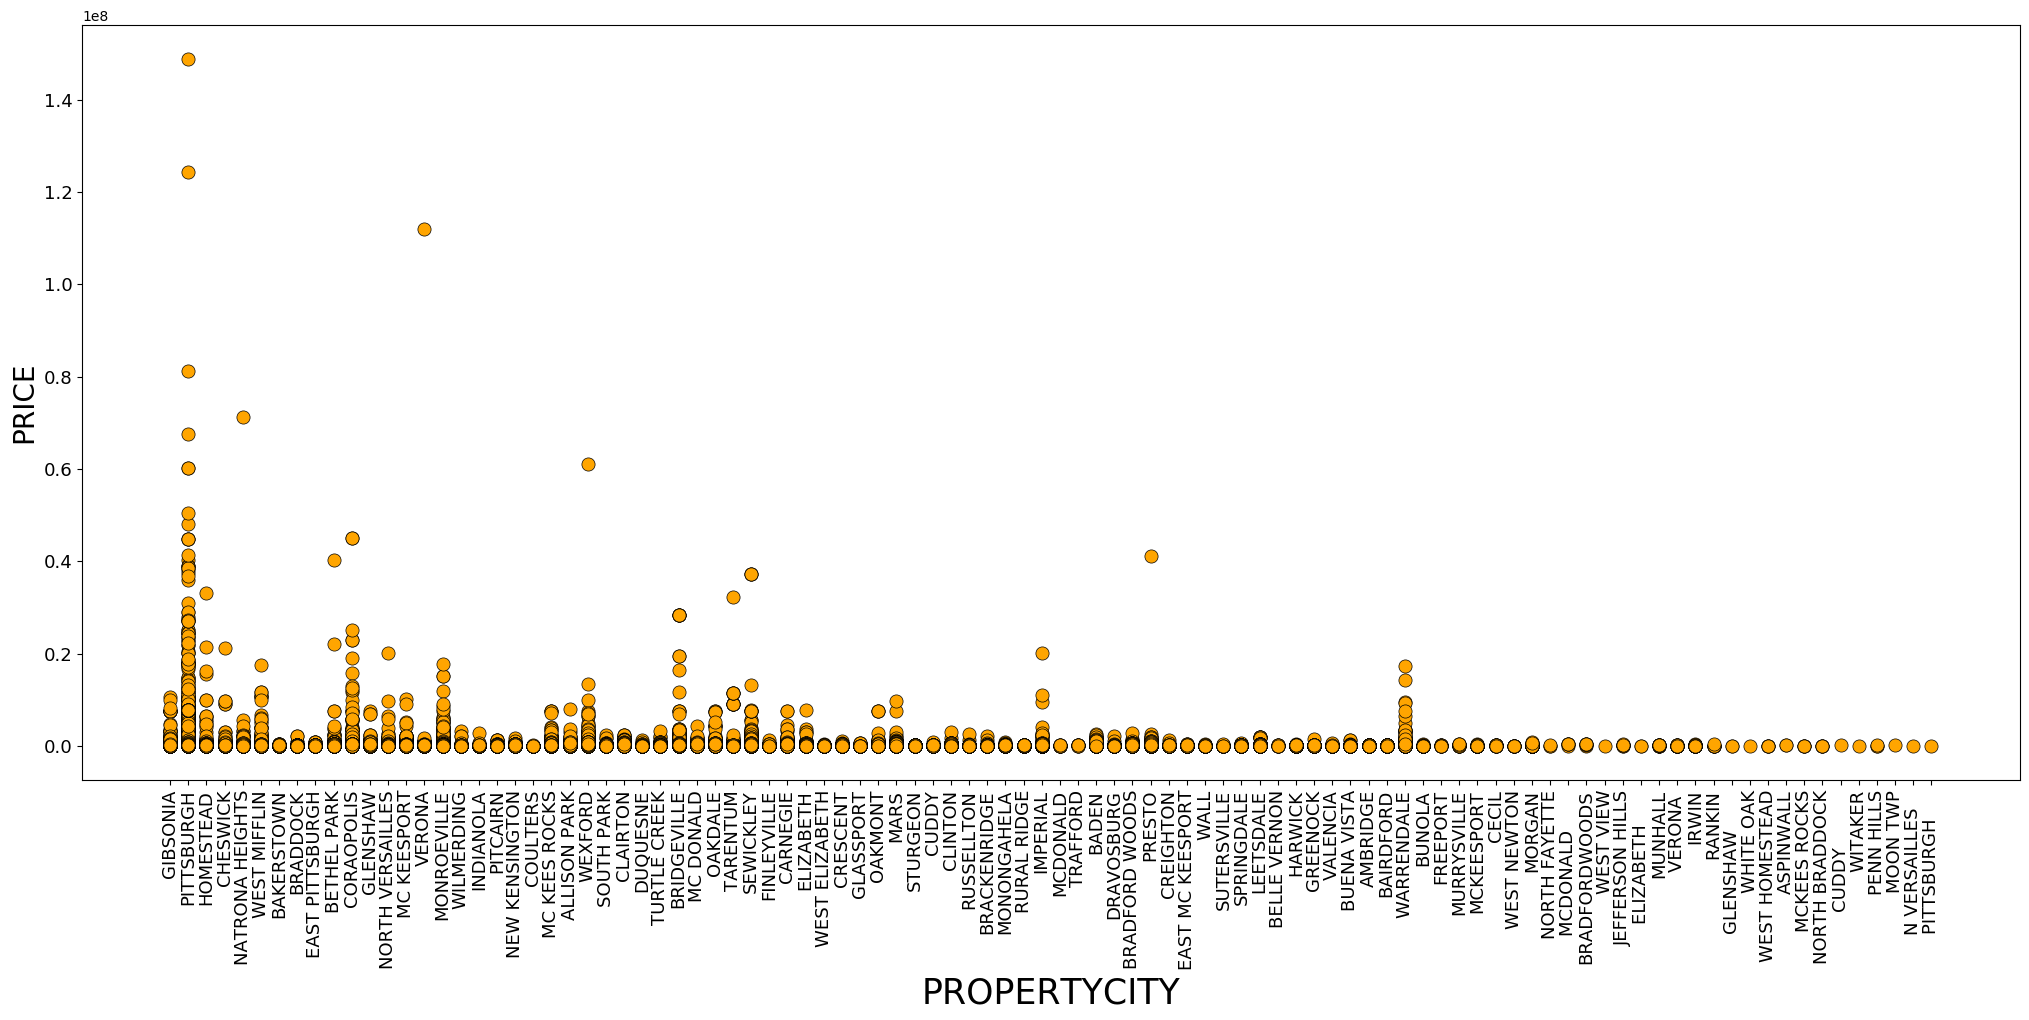

In [150]:
plt.figure(figsize=(25, 10), dpi=100)
plt.xticks(rotation = 90,fontsize=13)
plt.yticks(fontsize=13)
plt.scatter(x=data['PROPERTYCITY'], y=data['PRICE'], color="orange", edgecolors="#000000", linewidths=0.5, s = 90);
plt.xlabel("PROPERTYCITY",fontsize=25); plt.ylabel("PRICE",fontsize=20);

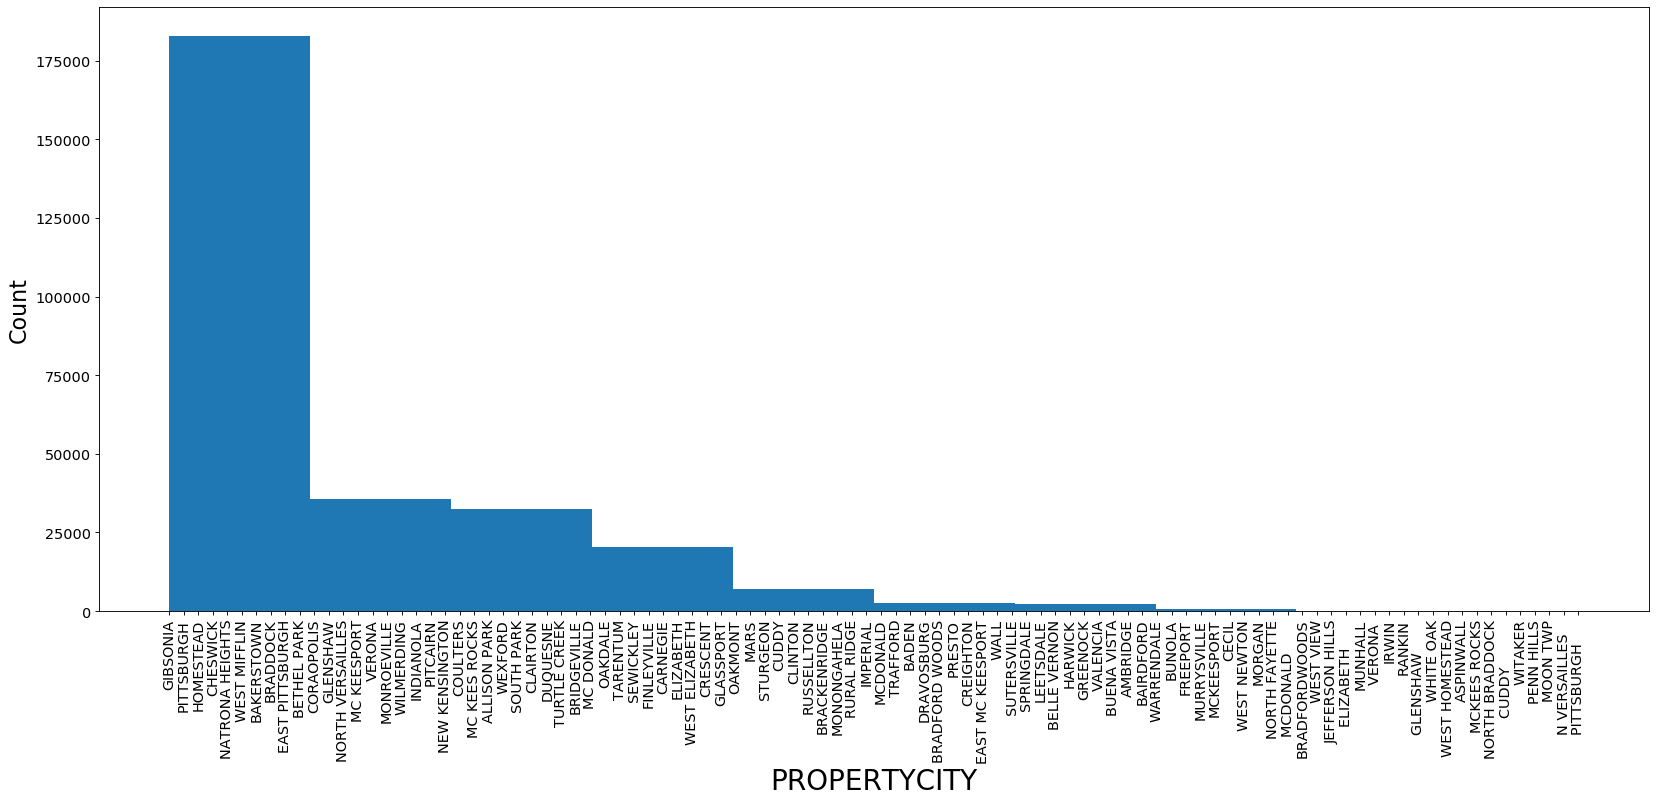

In [151]:
plt.figure(figsize=(25, 10), dpi=80)
plt.xticks(rotation = 90,fontsize=13)
plt.yticks(fontsize=13)
plt.hist(data['PROPERTYCITY'])
plt.xlabel("PROPERTYCITY",fontsize=25); plt.ylabel("Count",fontsize=20);

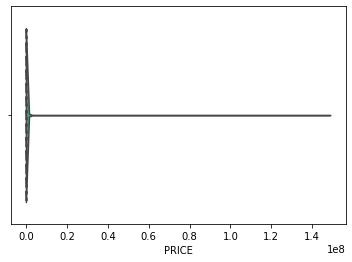

In [152]:
sns.violinplot(x=data['PRICE'], inner="quartile", color="#36B37E");

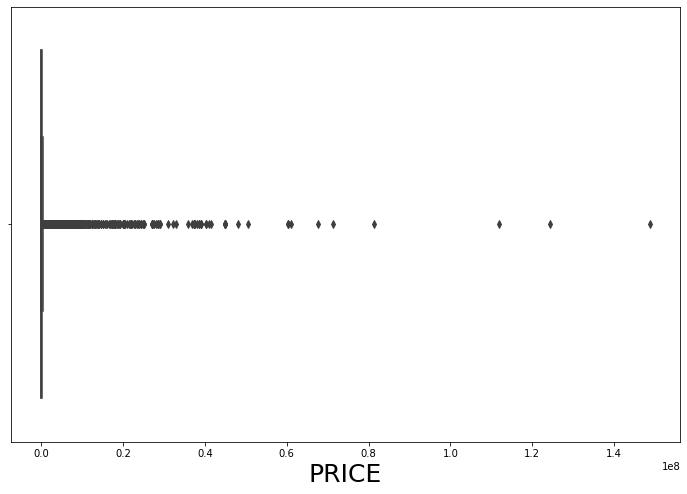

In [153]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['PRICE'])
plt.xlabel("PRICE",fontsize=25);

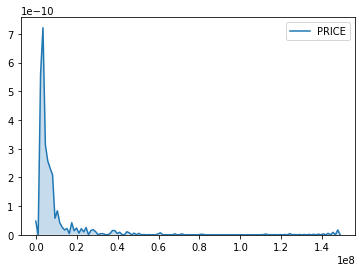

In [154]:
sns.kdeplot(data['PRICE'], shade=True);

### Remove zero values

In [155]:
data = data[data.PRICE != 0]

In [156]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
PROPERTYCITY_labels = gle.fit_transform(data['PROPERTYCITY'])
PROPERTYCITY_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
PROPERTYCITY_mappings

{0: 'ALLISON PARK',
 1: 'AMBRIDGE',
 2: 'ASPINWALL',
 3: 'BADEN',
 4: 'BAIRDFORD',
 5: 'BAKERSTOWN',
 6: 'BELLE VERNON',
 7: 'BETHEL PARK',
 8: 'BRACKENRIDGE',
 9: 'BRADDOCK',
 10: 'BRADFORD WOODS',
 11: 'BRADFORDWOODS',
 12: 'BRIDGEVILLE',
 13: 'BUENA VISTA',
 14: 'BUNOLA',
 15: 'CARNEGIE',
 16: 'CECIL',
 17: 'CHESWICK',
 18: 'CLAIRTON',
 19: 'CLINTON',
 20: 'CORAOPOLIS',
 21: 'COULTERS',
 22: 'CREIGHTON',
 23: 'CRESCENT',
 24: 'CUDDY',
 25: 'CUDDY          ',
 26: 'DRAVOSBURG',
 27: 'DUQUESNE',
 28: 'EAST MC KEESPORT',
 29: 'EAST PITTSBURGH',
 30: 'ELIZABETH',
 31: 'FINLEYVILLE',
 32: 'FREEPORT',
 33: 'GIBSONIA',
 34: 'GLASSPORT',
 35: 'GLENSHAW',
 36: 'GLENSHAW       ',
 37: 'GREENOCK',
 38: 'HARWICK',
 39: 'HOMESTEAD',
 40: 'IMPERIAL',
 41: 'INDIANOLA',
 42: 'IRWIN',
 43: 'JEFFERSON HILLS',
 44: 'LEETSDALE',
 45: 'MARS',
 46: 'MC DONALD',
 47: 'MC KEES ROCKS',
 48: 'MC KEESPORT',
 49: 'MCDONALD',
 50: 'MCDONALD       ',
 51: 'MCKEES ROCKS',
 52: 'MCKEESPORT',
 53: 'MONONGAHELA',
 5

In [157]:
data['PROPERTYCITY'] = PROPERTYCITY_labels

In [158]:
data.head()

,PROPERTYADDRESSSTREET,PROPERTYCITY,SCHOOLCODE,SALEDATE,PRICE,SALEDESC
0,HIGHPOINT,33,20,2012-09-27,120000.0,LOVE AND AFFECTION SALE
1,LOMBARD,69,47,2015-01-06,1783.0,CITY TREASURER SALE
2,FORBES,69,47,2012-10-26,4643.0,CITY TREASURER SALE
4,CARNEGIE,69,47,2015-02-04,27541.0,GOVERNMENT SALE
5,BUTLER,69,47,2013-03-19,1.0,CORRECTIVE DEED / DUPLICATE SALE


In [159]:
gle = LabelEncoder()
PROPERTYADDRESSSTREET_labels = gle.fit_transform(data['PROPERTYADDRESSSTREET'])
PROPERTYADDRESSSTREET_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
PROPERTYADDRESSSTREET_mappings

{0: '10TH',
 1: '11TH',
 2: '12TH',
 3: '13TH',
 4: '14TH',
 5: '15TH',
 6: '16TH',
 7: '17TH',
 8: '18TH',
 9: '19TH',
 10: '1ST',
 11: '20TH',
 12: '21ST',
 13: '22ND',
 14: '23RD',
 15: '24TH',
 16: '25TH',
 17: '26TH',
 18: '27TH',
 19: '28TH',
 20: '29TH',
 21: '2ND',
 22: '30TH',
 23: '31ST',
 24: '32ND',
 25: '33RD',
 26: '34TH',
 27: '35TH',
 28: '36TH',
 29: '37TH',
 30: '38TH',
 31: '39TH',
 32: '3RD',
 33: '40TH',
 34: '41ST',
 35: '42ND',
 36: '43RD',
 37: '43RD 1/2',
 38: '44TH',
 39: '45TH',
 40: '46TH',
 41: '47TH',
 42: '48TH',
 43: '49TH',
 44: '4TH',
 45: '51ST',
 46: '52ND',
 47: '53RD',
 48: '54TH',
 49: '55TH',
 50: '56TH',
 51: '57TH',
 52: '5TH',
 53: '6TH',
 54: '7TH',
 55: '8TH',
 56: '9TH',
 57: 'A',
 58: 'A LD',
 59: 'AACHEN',
 60: 'AARON',
 61: 'ABARD',
 62: 'ABBACY',
 63: 'ABBEY',
 64: 'ABBEYVILLE',
 65: 'ABBOTT',
 66: 'ABBY ROSE',
 67: 'ABDELL',
 68: 'ABEL',
 69: 'ABELE',
 70: 'ABER',
 71: 'ABERDEEN',
 72: 'ABERS CREEK',
 73: 'ABERYL',
 74: 'ABES',
 75: 'A

In [160]:
data['PROPERTYADDRESSSTREET'] = PROPERTYADDRESSSTREET_labels

In [161]:
data.head()

,PROPERTYADDRESSSTREET,PROPERTYCITY,SCHOOLCODE,SALEDATE,PRICE,SALEDESC
0,3723,33,20,2012-09-27,120000.0,LOVE AND AFFECTION SALE
1,4750,69,47,2015-01-06,1783.0,CITY TREASURER SALE
2,2880,69,47,2012-10-26,4643.0,CITY TREASURER SALE
4,1324,69,47,2015-02-04,27541.0,GOVERNMENT SALE
5,1188,69,47,2013-03-19,1.0,CORRECTIVE DEED / DUPLICATE SALE


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274406 entries, 0 to 307755
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PROPERTYADDRESSSTREET  274406 non-null  int32  
 1   PROPERTYCITY           274406 non-null  int32  
 2   SCHOOLCODE             274406 non-null  int64  
 3   SALEDATE               274406 non-null  object 
 4   PRICE                  274406 non-null  float64
 5   SALEDESC               274406 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 12.6+ MB


In [163]:
gle = LabelEncoder()
SALEDESC_labels = gle.fit_transform(data['SALEDESC'])
SALEDESC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
SALEDESC_mappings

{0: 'BANK/FINANCIAL INSTITUTION',
 1: 'BUILDING NOT YET ASSESSED',
 2: 'CHANGED AFTER SALE',
 3: 'CITY TREASURER SALE',
 4: 'CORPORATION TRANSFER',
 5: 'CORRECTIVE DEED / DUPLICATE SALE',
 6: 'COURT ORDERED SALE',
 7: 'DATE OF TRANSFER (RECORD YR <> SALE YR)',
 8: 'ESTATE SALE',
 9: 'EXEMPT BUYER OR SELLER',
 10: 'GOVERNMENT SALE',
 11: 'INCLUDES PERSONAL PROPERTY',
 12: 'LOVE AND AFFECTION SALE',
 13: 'MULTI-PARCEL SALE',
 14: 'NO ASSESSED VALUATION',
 15: 'NOT APPLICABLE',
 16: 'OTHER',
 17: 'OTHER INVALID SALES INDICATED',
 18: 'OTHER VALID',
 19: 'PREFERENTIAL ASMT',
 20: 'PREFERENTIAL VALID CLEAN & GREEN',
 21: 'QUIT CLAIM / SPECIAL WARRANTY',
 22: 'SALE NOT ANALYZED',
 23: 'SALE OF PREVIOUS FORECLOSURE - INVALID',
 24: 'SHERIFF SALE',
 25: 'SHORT SALE - INVALID',
 26: 'TIME ON MARKET (INSUFF/EXCESS)',
 27: 'VALID SALE'}

In [164]:
data['SALEDESC'] = SALEDESC_labels

In [165]:
data.head()

,PROPERTYADDRESSSTREET,PROPERTYCITY,SCHOOLCODE,SALEDATE,PRICE,SALEDESC
0,3723,33,20,2012-09-27,120000.0,12
1,4750,69,47,2015-01-06,1783.0,3
2,2880,69,47,2012-10-26,4643.0,3
4,1324,69,47,2015-02-04,27541.0,10
5,1188,69,47,2013-03-19,1.0,5


### Remove Outliers

In [166]:
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)

  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df

In [167]:
remove_outlier(data, 'PRICE')

,PROPERTYADDRESSSTREET,PROPERTYCITY,SCHOOLCODE,SALEDATE,PRICE,SALEDESC
0,3723,33,20,2012-09-27,120000.0,12
1,4750,69,47,2015-01-06,1783.0,3
2,2880,69,47,2012-10-26,4643.0,3
4,1324,69,47,2015-02-04,27541.0,10
5,1188,69,47,2013-03-19,1.0,5
...,...,...,...,...,...,...
307748,2962,69,46,2019-05-15,45000.0,27
307749,5615,69,22,2019-05-14,168000.0,27
307752,8498,69,47,2019-05-10,160000.0,17
307754,800,69,27,2019-05-15,229000.0,17


In [168]:
data.corr()

,PROPERTYADDRESSSTREET,PROPERTYCITY,SCHOOLCODE,PRICE,SALEDESC
PROPERTYADDRESSSTREET,1.000000,-0.011904,0.000920,0.002732,-0.000219
PROPERTYCITY,-0.011904,1.000000,0.306836,0.010462,0.003019
SCHOOLCODE,0.000920,0.306836,1.000000,0.002352,-0.043000
PRICE,0.002732,0.010462,0.002352,1.000000,0.017709
SALEDESC,-0.000219,0.003019,-0.043000,0.017709,1.000000


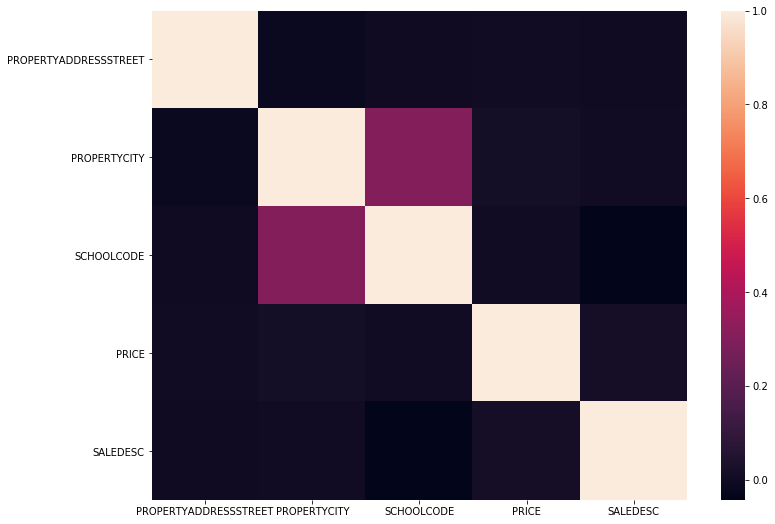

In [169]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(), ax=ax);

# Start the time series analysis

In [45]:
data_Prophet = data[['SALEDATE', 'PRICE']]

In [46]:
data_Prophet

,SALEDATE,PRICE
0,2012-09-27,120000.0
1,2015-01-06,1783.0
2,2012-10-26,4643.0
4,2015-02-04,27541.0
5,2013-03-19,1.0
...,...,...
307749,2019-05-14,168000.0
307752,2019-05-10,160000.0
307753,2019-05-22,4350000.0
307754,2019-05-15,229000.0


In [47]:
data_Prophet = data_Prophet.rename(columns={'SALEDATE': 'ds', 'PRICE': 'y'})

In [48]:
data_Prophet

,ds,y
0,2012-09-27,120000.0
1,2015-01-06,1783.0
2,2012-10-26,4643.0
4,2015-02-04,27541.0
5,2013-03-19,1.0
...,...,...
307749,2019-05-14,168000.0
307752,2019-05-10,160000.0
307753,2019-05-22,4350000.0
307754,2019-05-15,229000.0


In [49]:
import datetime
import fbprophet
from fbprophet import Prophet
m = Prophet()
m.fit(data_Prophet)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future = m.make_future_dataframe(periods=0)
future.tail()

,ds
274401,2020-11-16
274402,2020-11-16
274403,2020-11-16
274404,2020-11-16
274405,2020-11-19


In [51]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

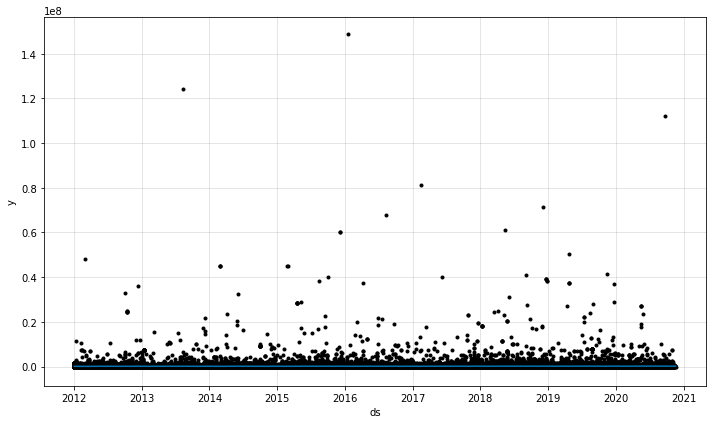

In [52]:
fig1 = m.plot(forecast)

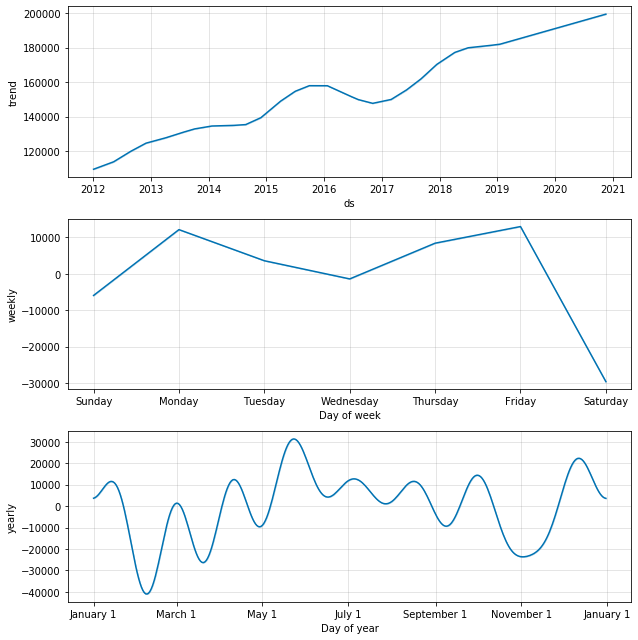

In [53]:
fig2 = m.plot_components(forecast)

In [170]:
data.drop(['SALEDATE'],axis=1, inplace=True)

In [171]:
y = data[['PRICE']] # Select Price as Y column (Target)
y.shape

(274406, 1)

In [172]:
X = data[['PROPERTYADDRESSSTREET', 'PROPERTYCITY', 'SCHOOLCODE', 'SALEDESC']]
X.shape

(274406, 4)

### Running Model without data Normalization

In [173]:
from sklearn.model_selection import train_test_split
# Divide the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn import metrics
print( "The accuracy result for The Multiple Linear Regression Model is ")
print( metrics.r2_score(y_test,y_pred))


The accuracy result for The Multiple Linear Regression Model is 
0.00020231923503399862


### Data Normalization

In [174]:
# Normalize the data attributes for the dataset.
from sklearn import preprocessing
normalized =pd.DataFrame(preprocessing.normalize(data))

normalized.columns= data.columns
normalized.head()

,PROPERTYADDRESSSTREET,PROPERTYCITY,SCHOOLCODE,PRICE,SALEDESC
0,0.031010,0.000275,0.000167,0.999519,0.000100
1,0.936089,0.013598,0.009262,0.351378,0.000591
2,0.527055,0.012627,0.008601,0.849694,0.000549
3,0.048018,0.002502,0.001705,0.998842,0.000363
4,0.997531,0.057937,0.039465,0.000840,0.004198


In [175]:
y_normalized = normalized[['PRICE']] # Select Price as Y column
y.shape

(274406, 1)

In [176]:
X_normalized = normalized[['PROPERTYADDRESSSTREET', 'PROPERTYCITY', 'SCHOOLCODE', 'SALEDESC']]
X.shape

(274406, 4)

In [177]:
from sklearn.model_selection import train_test_split
# Divide the data to train and test
X_normalized_train, X_normalized_test, y_normalized_train, y_normalized_test = train_test_split(X_normalized, y_normalized, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor_normalized = LinearRegression()
regressor_normalized.fit(X_normalized_train, y_normalized_train)

# Predicting the Test set results
y_pred_normalized = regressor_normalized.predict(X_normalized_test)

from sklearn import metrics
print( "The accuracy result for The Normalized Multiple Linear Regression Model is ")
print( metrics.r2_score(y_normalized_test,y_pred_normalized))


The accuracy result for The Normalized Multiple Linear Regression Model is 
0.9454325597076055


### Root Mean Square Error (RMSE)

In [178]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_normalized_test,y_pred_normalized)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.09579787693154342


In [179]:
# Divide the data to train and test
X_RFR_train, X_RFR_test, y_RFR_train, y_RFR_test = train_test_split(X_normalized, y_normalized, test_size = 0.2, random_state = 99)

In [180]:
# Random Forest Regression using 200 trees with out of bag = true
from sklearn.ensemble import RandomForestRegressor
regressor_RFR = RandomForestRegressor(n_estimators = 200, random_state = 0, oob_score=True)
regressor_RFR.fit(X_RFR_train, y_RFR_train)
y_predRandomForest = regressor_RFR.predict(X_RFR_test)
from sklearn import metrics
print( metrics.r2_score(y_RFR_test,y_predRandomForest))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.999871436492488


In [181]:
print("the accuracy of the model = " + str(metrics.r2_score(y_RFR_test,y_predRandomForest)))

the accuracy of the model = 0.999871436492488


### Root Mean Square Error (RMSE)

In [182]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_RFR_test,y_predRandomForest)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for Random Forest:\n")
print(RMSE)

Root Mean Square Error for Random Forest:

0.004631905714294685


### Deployment

In [183]:
import pickle

In [184]:
pickle.dump(regressor_RFR, open('model.pkl','wb'))